In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV
df = pd.read_csv("../data/semantic-web-journal-analysis.csv")

df.head()

,paper_id,reviewer,review_date,review_suggestion,length_words,title,abstract,days_to_submit,review_text,mattr,question_count,citation_count,sentiment_polarity,politeness_score,relevance_score,num_days_before_deadline
0,3771-4985,Anonymous,02/Dec/2024,Accept,19,The ANthropological Notation Ontology (ANNO): ...,The Anthropological Notation Ontology (ANNO) a...,56,"After the revision, this paper looks better. I...",0.8947,0,0,0.500000,0.2086,0.703602,14
1,3771-4985,Yuming Shen,16/Dec/2024,Accept,24,The ANthropological Notation Ontology (ANNO): ...,The Anthropological Notation Ontology (ANNO) a...,70,The revised manuscript has been reviewed thoro...,0.9167,0,0,-0.120833,0.1304,0.679735,0
2,3763-4977,Anonymous,08/Oct/2024,Accept,18,Enhancing Ontology Matching: Lexically and Syn...,Ontology matching systems commonly leverage si...,9,"After reviewing the updated manuscript, I find...",0.8333,0,0,0.000000,0.1571,0.740802,93
3,3763-4977,Anonymous,09/Jan/2025,Accept,107,Enhancing Ontology Matching: Lexically and Syn...,Ontology matching systems commonly leverage si...,102,"In my initial review, I had concerns around ""(...",0.7149,0,0,0.131746,0.2476,0.716330,0
4,3754-4968,Anonymous,14/Dec/2024,Reject,493,Nordic Spatial Humanities: Ups and Downs in LO...,The article constitutes a report of a LOD appl...,103,The paper discusses the results of two worksho...,0.7886,5,1,0.058102,0.1041,0.894614,24


In [3]:
num_reviews = len(df)
num_papers = df['paper_id'].nunique()
num_reviewers = df['reviewer'].nunique()
num_anonymous = (df['reviewer'].str.lower() == "anonymous").sum()

print(f"Total Reviews: {num_reviews}")
print(f"Unique Papers: {num_papers}")
print(f"Unique Reviewers: {num_reviewers}")
print(f"Anonymous Reviews: {num_anonymous} ({num_anonymous / num_reviews * 100:.2f}%)")


Total Reviews: 1805
Unique Papers: 690
Unique Reviewers: 576
Anonymous Reviews: 803 (44.49%)


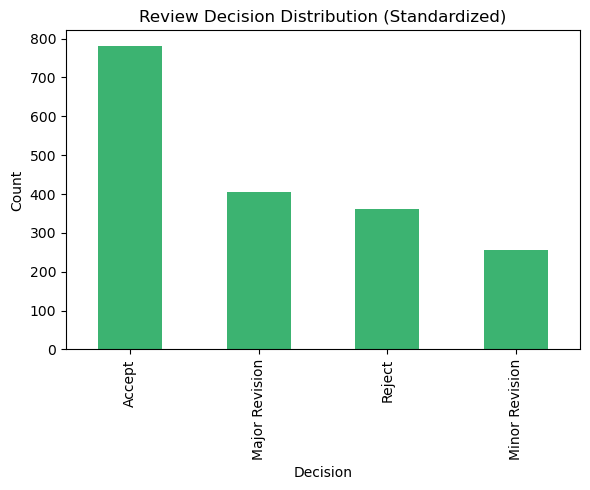

In [8]:
# Define a mapping for standardizing review decisions
decision_mapping = {
    "Accept": "Accept",
    "Minor Revision": "Minor Revision",
    "Major Revision": "Major Revision",
    "Reject": "Reject",
    "[EKAW] combined track accept": "Accept",
    "[EKAW] conference only accept": "Accept",
    "[EKAW] reject": "Reject",
}

# Apply mapping to create a new standardized column
df["review_suggestion_cleaned"] = df["review_suggestion"].map(decision_mapping).fillna(df["review_suggestion"])

# Plot cleaned decisions
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
df['review_suggestion_cleaned'].value_counts().plot(kind='bar', color='mediumseagreen')
plt.title("Review Decision Distribution (Standardized)")
plt.xlabel("Decision")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


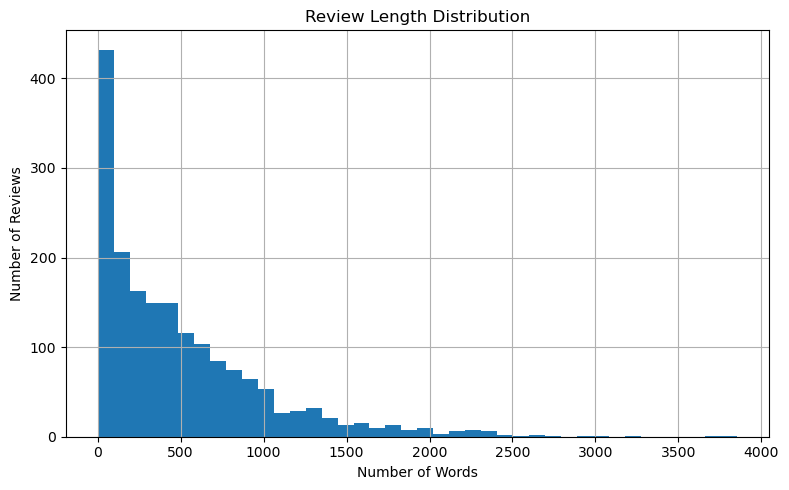

In [4]:
plt.figure(figsize=(8,5))
df['length_words'].hist(bins=40)
plt.title("Review Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Number of Reviews")
plt.grid(True)
plt.tight_layout()
plt.show()


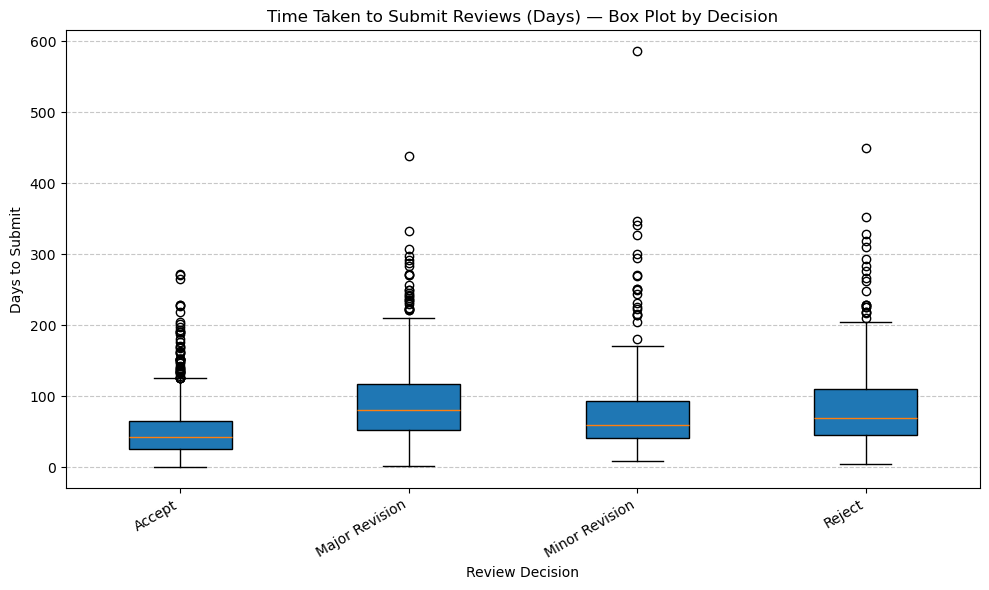

In [11]:
import matplotlib.pyplot as plt

# Use the cleaned decision column if it exists
if "review_suggestion_cleaned" in df.columns:
    decision_col = "review_suggestion_cleaned"
else:
    decision_col = "review_suggestion"

# Prepare data
boxplot_data = []
labels = []

# Gather data per decision
for decision in sorted(df[decision_col].unique()):
    subset = df[df[decision_col] == decision]['days_to_submit'].dropna()
    if not subset.empty:
        boxplot_data.append(subset)
        labels.append(decision)

# Plot
plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, labels=labels, showfliers=True, patch_artist=True)
plt.title("Time Taken to Submit Reviews (Days) — Box Plot by Decision")
plt.xlabel("Review Decision")
plt.ylabel("Days to Submit")
plt.xticks(rotation=30, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



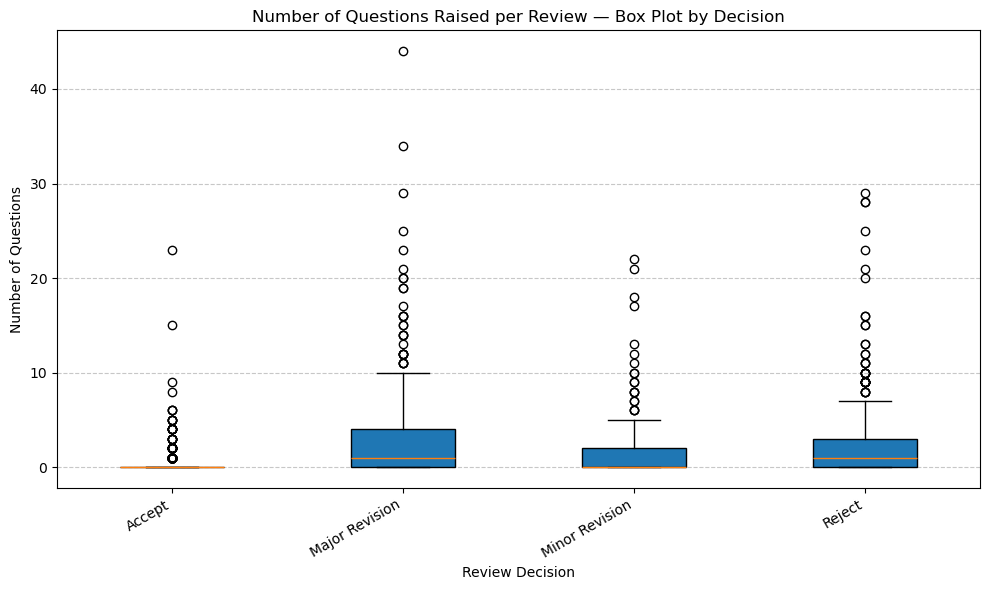

In [13]:
import matplotlib.pyplot as plt

# Use the cleaned decision column if available
if "review_suggestion_cleaned" in df.columns:
    decision_col = "review_suggestion_cleaned"
else:
    decision_col = "review_suggestion"

# Prepare data
boxplot_data = []
labels = []

for decision in sorted(df[decision_col].unique()):
    subset = df[df[decision_col] == decision]['question_count'].dropna().astype(int)
    if not subset.empty:
        boxplot_data.append(subset)
        labels.append(decision)

# Plot
plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, labels=labels, showfliers=True, patch_artist=True)
plt.title("Number of Questions Raised per Review — Box Plot by Decision")
plt.xlabel("Review Decision")
plt.ylabel("Number of Questions")
plt.xticks(rotation=30, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




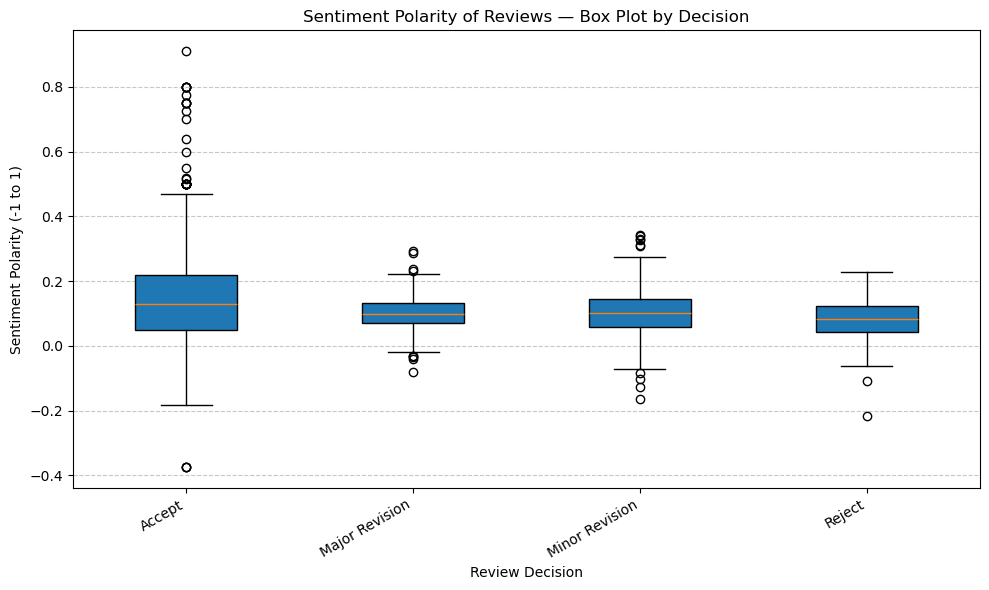

In [15]:
import matplotlib.pyplot as plt

# Use the cleaned decision column if available
if "review_suggestion_cleaned" in df.columns:
    decision_col = "review_suggestion_cleaned"
else:
    decision_col = "review_suggestion"

# Prepare data
boxplot_data = []
labels = []

for decision in sorted(df[decision_col].unique()):
    subset = df[df[decision_col] == decision]['sentiment_polarity'].dropna()
    if not subset.empty:
        boxplot_data.append(subset)
        labels.append(decision)

# Plot
plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, labels=labels, showfliers=True, patch_artist=True)
plt.title("Sentiment Polarity of Reviews — Box Plot by Decision")
plt.xlabel("Review Decision")
plt.ylabel("Sentiment Polarity (-1 to 1)")
plt.xticks(rotation=30, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



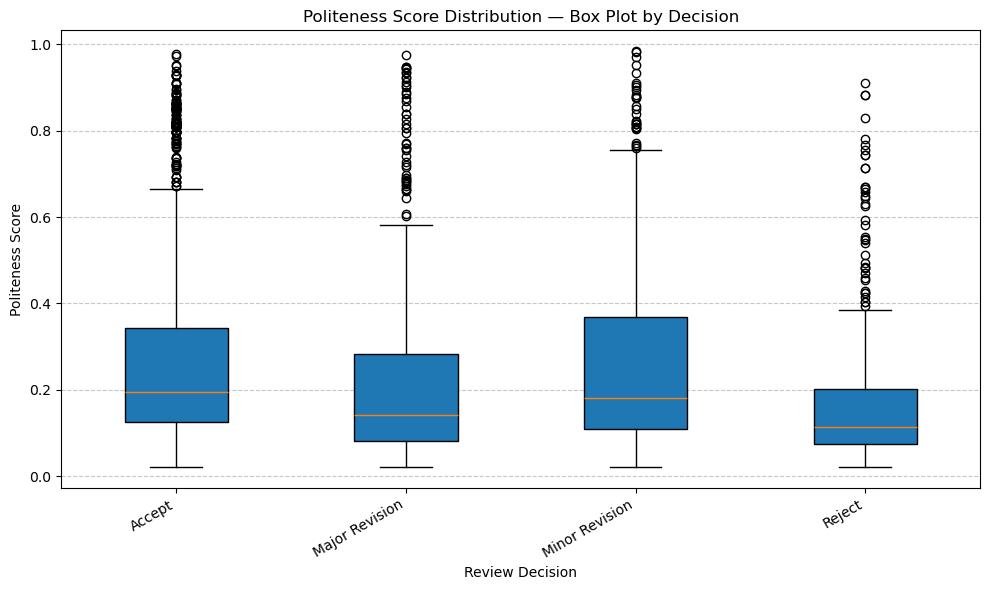

In [17]:
import matplotlib.pyplot as plt

# Use the cleaned decision column if available
if "review_suggestion_cleaned" in df.columns:
    decision_col = "review_suggestion_cleaned"
else:
    decision_col = "review_suggestion"

# Prepare data
boxplot_data = []
labels = []

for decision in sorted(df[decision_col].unique()):
    subset = df[df[decision_col] == decision]['politeness_score'].dropna()
    if not subset.empty:
        boxplot_data.append(subset)
        labels.append(decision)

# Plot
plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, labels=labels, showfliers=True, patch_artist=True)
plt.title("Politeness Score Distribution — Box Plot by Decision")
plt.xlabel("Review Decision")
plt.ylabel("Politeness Score")
plt.xticks(rotation=30, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



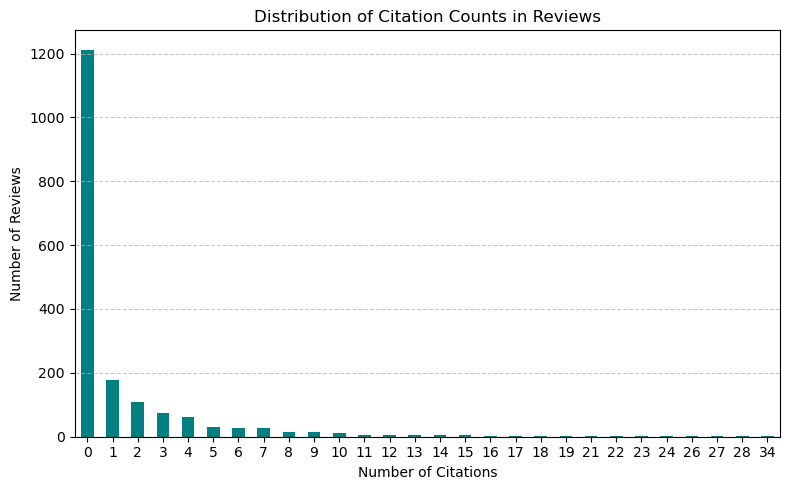

In [20]:
import matplotlib.pyplot as plt

# Make sure citation_count is numeric
df['citation_count'] = pd.to_numeric(df['citation_count'], errors='coerce')

# Plot
plt.figure(figsize=(8, 5))
df['citation_count'].value_counts().sort_index().plot(kind='bar', color='teal')

plt.title("Distribution of Citation Counts in Reviews")
plt.xlabel("Number of Citations")
plt.ylabel("Number of Reviews")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
